#  DATA 558 - Homework 7
Will Wright
***


## Exercise 1 - Lab 7

Study Lab #7 and do the exercises therein.

In this lab we'll discuss kernels and how they can be used in conjunction with support vector machines. By the end of this lab, you should know:
- What a kernel is and why we use them
- What a kernel SVM is and how to implement one

## 1 Kernels

Kernels may be intuitively thought of as similarity measures. They are functions that take two inputs from a set $\mathcal{X}$ and output a real number $\mathbb{R}$. Below are several examples.

#### 1. RBF kernel  
The radial basis function (RBF) kernel is given by
$$ k(x,y) = \exp\left(-\frac{1}{2\sigma^2}\|x-y\|^2\right),$$
where $\sigma$ is a parameter called the bandwidth that needs to be set. If we fix an element $x=1$ and picture what happens in the one-dimensional case when $\sigma=0.5$, we get the picture below:

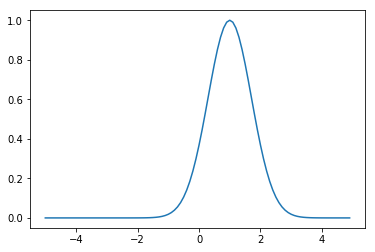

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = 1
sigma=1
y = np.arange(-5, 5, 0.1)
K = np.exp(-1/sigma**2*(x-y)**2)
plt.plot(y, K)

We can see that $k(x,y)$ is largest when $y=x$ (i.e., when they are most similar) and that as $y$ becomes farther away from $x$ the value of the $k(x,y)$ decreases.

#### 2. Hellinger kernel
The Hellinger kernel is given by $k(x,y) = \sum_{i=1}^d\sqrt{x_iy_i}$ for $x,y\in\mathbb{R}^d$ and is often used on normalized histograms. 

#### 3. A kernel for text
Let $x,x'$ be two texts. Define $\phi$ to be a mapping from a text to a vector with counts of the number of times every word in the English language appears in the text. Then $k(x,x')= \phi(x)^T\phi(x')$ is a kernel.

More technically, let $\mathcal{X}$ be a non-empty set. A function $k:\mathcal{X}\times\mathcal{X}\to\mathbb{R}$ is called a kernel if there exists a Hilbert space $\mathcal{H}$ and a map $\phi:\mathcal{X}\to\mathcal{H}$ such that for all $x,x'\in\mathcal{X}$,
$$ k(x,x') = \langle \phi(x), \phi(x')\rangle_\mathcal{H}.$$
The main point here is that $k$ can be written as an inner product. You can think of a kernel as preprocessing observations $x$ and $x'$ by applying $\phi$ and then taking the inner product of $\phi(x)$ and $\phi(x')$.

Kernel-based methods can control the smoothness of decision functions and help avoid underfitting and overfitting. Suppose a linear model is not appropriate for a given dataset. Then we could consider first applying a nonlinear function $\phi$ to the datapoints and then fitting a linear classifier on the transformed features. Unlike with other methods, with kernel methods the features generated via such a $\phi$ are often infinite-dimensional. While it may seem like infinite-dimensional features would be impossible to handle, if all we need is to evaluate inner products, then we can just rely on evaluating the kernel rather than ever worrying about (or even knowing) $\phi$. This will be made more concrete in the next section.

A note on terminology: Let $x_1,\dots, x_n\in\mathcal{X}$ be a set of observations and $k:\mathcal{X}\times\mathcal{X}\to\mathbb{R}$ be a kernel. The matrix given by
\begin{equation}
\begin{bmatrix}
k(x_1,x_1) & k(x_1,x_2) & \cdots & k(x_1,x_n) \\
k(x_2,x_1) & k(x_2,x_2) & \cdots & k(x_2,x_n) \\
\vdots & & \ddots & \vdots\\
k(x_n,x_1) & k(x_n,x_2) & \cdots & k(x_n,x_n)
\end{bmatrix}
\end{equation}
or alternatively written as $[k(x_i,x_j)]_{i,j=1}^n$ is called the Gram matrix and henceforth will be denoted by $K$. 

## 2 Kernel SVM

If an algorithm relies on only dot products between features, then it can be "kernelized", i.e., we can use kernels with it. This is the case for many common machine learning methods, such as ridge regression, SVMs, PCA, CCA, $k$-means,... Here we'll examine the kernel SVM. 

### 2.1 Formulation
Suppose we have inputs $x_1,\dots, x_n\in\mathbb{R}^d$ and corresponding labels $y_1,\dots, y_n\in\{-1, +1\}$. Recall that the linear SVM with the squared hinge loss is given by
$$ \min_{w\in\mathbb{R}^d} \frac{1}{n}\sum_{i=1}^n \left\{\max\left(0, 1-y_iw^Tx_i\right)\right\}^2 + \lambda\|w\|^2_2$$
or equivalently,
$$ \min_{w\in\mathbb{R}^d} \frac{1}{n}\sum_{i=1}^n \left\{\max\left(0, 1-y_i\langle w, x_i\rangle_{\mathbb{R}^d}\right)\right\}^2 + \lambda\|w\|^2_2. \hspace{3cm} \text{(1)}$$

Letting $\beta=(\beta_1, \dots, \beta_n)^T$ and $K_i=(K(x_1, x_i),K(x_2,x_i),\dots, K(x_n,x_i))^T$, the kernelized version of the above objective is
\begin{align}
\min_{\beta\in\mathbb{R}^n} \frac{1}{n}\sum_{i=1}^n \left\{\max\left(0, 1-y_i\beta^TK_i\right)\right\}^2 + \lambda \beta^TK\beta.  \hspace{3cm} \text{(2)}
\end{align}

Note here that we're optimizing over $\beta\in\mathbb{R}^n$, i.e., the dimension of the vector we're optimizing over is the number of observations in the dataset rather than the dimension of the data.

We can optimize this objective via (fast) gradient descent. 

**Exercise 1** Compute the gradient of the objective function in equation (2).

TODO: Actually write out the computations.  
Result will be:  

$$\begin{equation}
  \nabla Q(\beta; x_i, y_i) =\begin{cases}
    n\lambda\beta - y_i x_i, & \text{if $1-y_i x_i>0$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}$$

Now we're capable of optimizing this objective function. But once we do, how do we compute the prediction for a new point $x\in\mathbb{R}^d$? Recall that in a linear SVM we label a point $x$ as +1 if $w^Tx>0$ and as -1 otherwise. Here we analogously label a point as +1 if $\sum_{i=1}^n \beta_ik(x_i, x)>0$ and -1 otherwise. 

### 2.2 Do-it-yourself kernel SVM
Now we're ready to try it! We'll solve the problem using fast gradient descent.

First, we code the objective function for the kernel SVM given in equation (2).

In [ ]:
def obj(beta, K, y, lam):
    """
    Inputs:
    - beta: Vector to be optimized
    - K: Gram matrix consisting of evaluations of the kernel k(x_i, x_j) for i,j=1,...,n
    - y: Labels y_1,...,y_n corresponding to x_1,...,x_n
    - lam: Penalty parameter lambda
    Output:
    - Value of the objective function at beta
    """
    return np.mean(np.maximum(0, 1-y*K.dot(beta))**2) + lam*beta.dot(K).dot(beta)

Next, we code the gradient of the objective function for the kernel SVM. 

In [ ]:
def grad(beta, K, y, lam):
    """
    Inputs:
    - beta: Vector to be optimized
    - K: Gram matrix consisting of evaluations of the kernel k(x_i, x_j) for i,j=1,...,n
    - y: Labels y_1,...,y_n corresponding to x_1,...,x_n
    - lam: Penalty parameter lambda
    Output:
    - Value of the gradient at beta
    """
    return -2*np.mean(np.maximum(0, 1-y*K.dot(beta))*y*K, axis=1) + 2*lam*K.dot(beta)

In [ ]:
import sklearn.metrics
def test_grad(eps=1e-6):
    n = 5
    for i in range(n):
        np.random.seed(0)
        beta = -np.random.normal(size=n)
        x = np.random.randn(n, n)
        K = sklearn.metrics.pairwise.rbf_kernel(x, x)
        y = np.random.choice([0, 1], size=5)
        lam = 0.5
        f1 = obj(beta, K, y, lam)
        beta[i] = beta[i] + eps
        f2 = obj(beta, K, y, lam)
        print('Estimated and calculated values of beta[', i, ']:', (f2-f1)/eps, grad(beta, K, y, lam)[i])
        assert np.isclose((f2-f1)/eps, grad(beta, K, y, lam)[i]), 'Estimated gradient ' + str((f2-f1)/eps) + ' is not approximately equal to the computed gradient ' + str(grad(beta, K, y, lam)[i])
    print('Test passed')
  
test_grad()

Since you've coded the fast gradient method yourself before, we will use my code for it in this lab.

In [ ]:
def bt_line_search(beta, K, y, lam, eta=1, alpha=0.5, betaparam=0.8, maxiter=100):
    grad_beta = grad(beta, K, y, lam)
    norm_grad_beta = np.linalg.norm(grad_beta)
    found_eta = 0
    iter = 0
    while found_eta == 0 and iter < maxiter:
        if obj(beta - eta * grad_beta, K, y, lam) < \
                        obj(beta, K, y, lam) - alpha * eta * norm_grad_beta ** 2:
            found_eta = 1
        elif iter == maxiter-1:
            raise ('Max number of iterations of backtracking line search reached')
        else:
            eta *= betaparam
            iter += 1
    return eta

def fastgradalgo(beta_init, theta_init, K, y, lam, eta_init, maxiter, eps=1e-5):
    beta = beta_init
    theta = theta_init
    eta = eta_init
    grad_theta = grad(theta, K, y, lam)
    grad_beta = grad(beta, K, y, lam)
    beta_vals = beta
    iter = 0
    while iter < maxiter and np.linalg.norm(grad_beta) > eps:
        eta = bt_line_search(theta, K, y, lam, eta=eta)
        beta_new = theta - eta*grad_theta
        theta = beta_new + iter/(iter+3)*(beta_new-beta)
        grad_theta = grad(theta, K, y, lam)
        grad_beta = grad(beta, K, y, lam)
        beta = beta_new
        iter += 1
        if iter % 1 == 0:
            beta_vals = np.vstack((beta_vals, beta_new))
    return beta_vals

**Exercise 2** We'll use the RBF kernel here. Recall that the RBF kernel is given by
$$ k(x,y) = \exp\left(-\frac{1}{2\sigma^2}\|x-y\|^2\right).$$
Fill in the code to evaluate the kernel on matrices of observations of $X\in\mathbb{R}^{n\times d}$ and $Z\in\mathbb{R}^{m\times d}$. It should return $k(x_i,z_j)_{i,j=1}^{n,m}$. Code it yourself; don't use scikit-learn. Then test it with the scikit-learn code I provide below.

In [ ]:
def gram(X, Z=None, sigma=0.5):
    """
    Inputs: 
    - X: matrix with observations as rows
    - Z: Another matrix with observations as rows
    - Sigma: kernel bandwidth
    Output: Gram matrix
    """  
    if Z is None:
        Z = X
    gram = None
    
    return gram

In [ ]:
def test_gram():  
    np.random.seed(0)
    X = np.random.randn(6, 5)
    Z = np.random.randn(7, 5)
    sigma = 10
    gram1 = gram(X, Z, sigma)
    gram2 = sklearn.metrics.pairwise.rbf_kernel(X, Z, gamma=1/(2*sigma**2))
    assert np.allclose(gram1, gram2), 'Computed matrix' + str(gram1) + 'does not match that of scikit-learn:' + str(gram2)
    print('Test passed')
    
test_gram()

### 2.3 Artificial data example

We will consider an artificial dataset so we can visualize what the classifier ends up doing. Below you can see the data. The training points are solid colors and the test points are semi-transparent.  
Credits: Some of this code was taken and modified from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = sklearn.datasets.make_circles(noise=0.2, factor=0.5, random_state=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
y_train = 2*y_train - 1
y_test = 2*y_test - 1
print('Number of training examples:', X_train.shape[0])
print('Number of test examples:', X_test.shape[0])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.1,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

In [ ]:
def objective_plot(betas, K, y, lam, save_file=''):
    num_points = np.size(betas, 0)
    objs = np.zeros(num_points)
    for i in range(0, num_points):
        objs[i] = obj(betas[i, :], K, y, lam)
    fig, ax = plt.subplots()
    ax.plot(np.array(range(num_points)), objs, c='red')
    plt.xlabel('Iteration')
    plt.ylabel('Objective value')
    plt.title('Objective value vs. iteration when lambda=' + str(lam))
    plt.show()

Now we're finally ready to try out our SVM code. We'll use a rule-of-thumb for the bandwidth of the RBF kernel. The rule-of-thumb says to use the median distance between all pairs of points in the training set.

In [ ]:
import scipy.linalg

# Initialize things
n, d = X_train.shape
lam = 1
beta_init = np.zeros(n)
theta_init = np.zeros(n)
dists = sklearn.metrics.pairwise.pairwise_distances(X_train).reshape(-1)
sigma = np.median(dists)
print('sigma=', sigma)
K = gram(X_train, X_train, sigma)
# Set eta_init based on an upper bound on the Lipschitz constant
eta_init = 1 / scipy.linalg.eigh(2 / n * np.dot(K, K) + 2 * lam * K, eigvals=(n - 1, n - 1),
                                 eigvals_only=True)[0]
maxiter = 100

# Run the algorithm
betas = fastgradalgo(beta_init, theta_init, K, y_train, lam, eta_init, maxiter)

# Examine results
print('Optimal betas:', betas[-1, :])
objective_plot(betas, K, y_train, lam, save_file='')

It looks like it works! Now what is the misclassification error, and what does the decision boundary look like?

**Exercise 3** Fill in the code below to compute the misclassification error. Recall that our prediction for a new point $x$ is $$\text{sign}\left(\sum_{i=1}^n \beta_ik(x_i, x)\right).$$

In [ ]:
def misclassification_error(beta, X_train, X_test, y_test, kernel, **kwargs):
    n_test = len(y_test)
    y_pred = np.zeros(n_test)
    y_vals = np.zeros(n_test)
    # To do: Change the argument of range from 1 to the appropriate value
    for i in range(1):
        if 'sigma' in kwargs:
            sigma = kwargs['sigma']
            y_vals[i] = np.dot(kernel(X_train, X_test[i, :].reshape(1, -1), sigma).reshape(-1), beta)
        else:
            y_vals[i] = np.dot(kernel(X_train, X_test[i, :].reshape(1, -1)).reshape(-1), beta)
    # To do: Take the sign of y_vals to get y_pred
    y_pred = None
    return np.mean(y_pred != y_test), y_vals  # return error and values from before applying cutoff

In [ ]:
def evaluate(betas, gram, sigma=None):
    Zs = np.c_[xx.ravel(), yy.ravel()]
    if sigma:
        error, test_values = misclassification_error(betas[-1, :], X_train, X_test, y_test, gram, sigma=sigma)
        Z = misclassification_error(betas[-1, :], X_train, Zs, [0]*len(Zs), gram, sigma=sigma)[1]
    else:
        error, test_values = misclassification_error(betas[-1, :], X_train, X_test, y_test, gram)
        Z = misclassification_error(betas[-1, :], X_train, Zs, [0]*len(Zs), gram)[1]
    print('Misclassification error when lambda =', lam, ':', error)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = plt.subplot()
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()
    
evaluate(betas, gram, sigma)

Note that the decision boundary is non-linear, as we would expect. Now let's compare to a non-kernel SVM. This is the same as using a kernel SVM with the linear kernel $K(x,y)=x^Ty$, so we can reuse our code from above and just modify the kernel.

**Exercise 4** Fill in the code below to compute the linear kernel. Test your code using the code from scikit-learn below.

In [ ]:
def gram_linear(X, Z=None):
    """
    Inputs: 
    - X: matrix with observations as rows
    - Z: Another matrix with observations as rows
    Output: Gram matrix
    """  
    return None

In [ ]:
def test_gram():  
    np.random.seed(0)
    X = np.random.randn(6, 5)
    Z = np.random.randn(7, 5)
    sigma = 10
    gram1 = gram_linear(X, Z)
    gram2 = sklearn.metrics.pairwise.linear_kernel(X, Z)
    assert np.allclose(gram1, gram2), 'Computed matrix' + str(gram1) + 'does not match that of scikit-learn:' + str(gram2)
    print('Test passed')
    
test_gram()

Now let's run the code again!

In [ ]:
# Initialize things
n, d = X_train.shape
lam = 1
beta_init = np.zeros(n)
theta_init = np.zeros(n)
K = gram_linear(X_train, X_train)
eta_init = 1 / scipy.linalg.eigh(2 / n * np.dot(K, K) + 2 * lam * K, eigvals=(n - 1, n - 1),
                                 eigvals_only=True)[0]
maxiter = 10

# Run the algorithm
betas = fastgradalgo(beta_init, theta_init, K, y_train, lam, eta_init, maxiter)

# Examine results
print('Optimal betas:', betas[-1, :])
objective_plot(betas, K, y_train, lam, save_file='')
evaluate(betas, gram_linear, sigma=None)

Here the decision boundary is linear, which is clearly inappropriate for this data. Using a kernel SVM makes a big difference!